In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Descriptive distribution plots

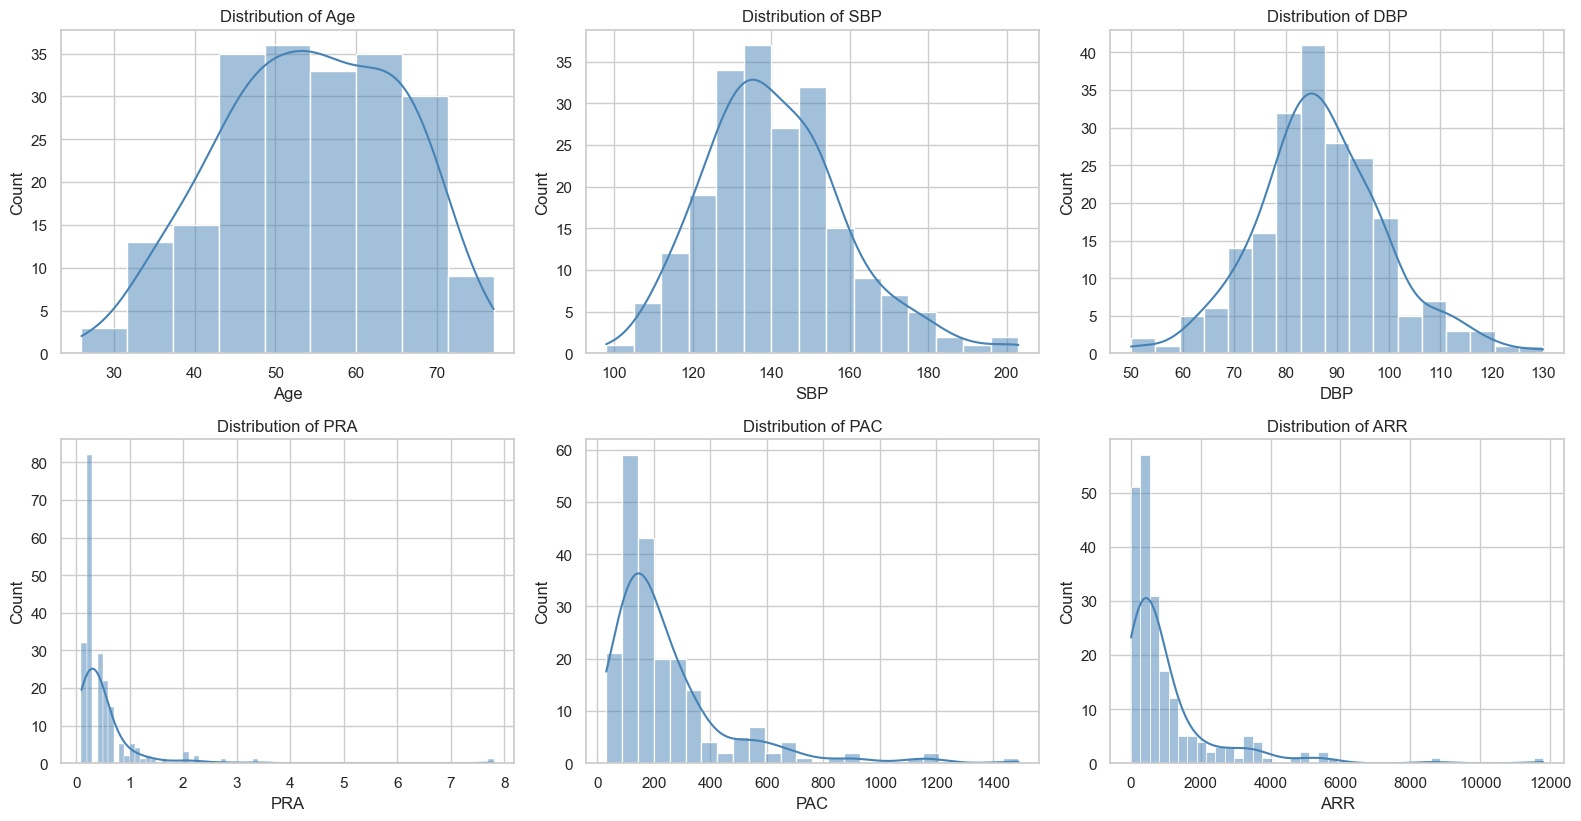

In [12]:
avs_df = pd.read_csv("../data/processed/AVS_Dryad_cleaned.csv")

# Variables for distribution analysis
focus_vars = ['Age', 'SBP', 'DBP', 'PRA', 'PAC', 'ARR']

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable
for idx, col in enumerate(focus_vars):
    sns.histplot(
        avs_df[col], 
        kde=True, 
        ax=axes[idx], 
        color="steelblue"
        )
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Remove any unused axes
for j in range(len(focus_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('../outputs/figures/descriptive/histogram.png')
plt.show()

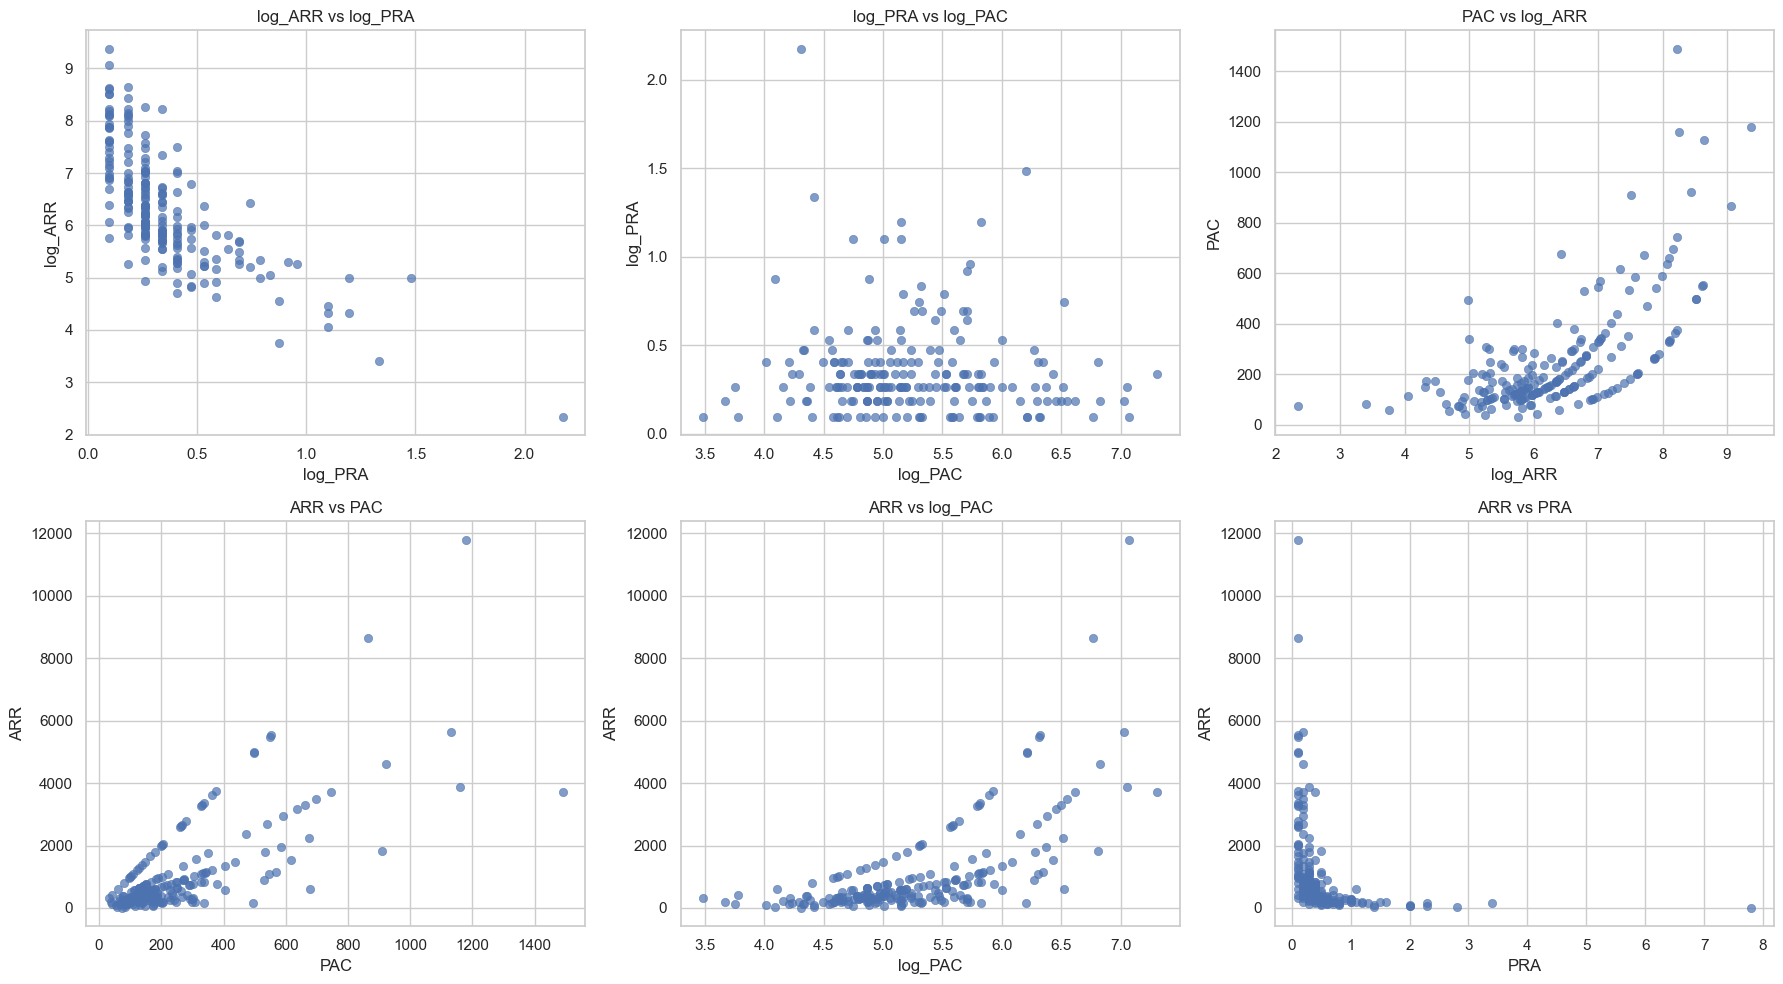

In [14]:
# Apply log-transform to skewed variables
avs_df['log_PRA'] = np.log1p(avs_df['PRA'])  # log(1 + x) avoids log(0)
avs_df['log_PAC'] = np.log1p(avs_df['PAC'])
avs_df['log_ARR'] = np.log1p(avs_df['ARR'])

# Scatterplots to explore relationships
scatter_pairs = [
    ('log_PRA', 'log_ARR'),     # Hormone-to-hormone
    ('log_PAC', 'log_PRA'),
    ('log_ARR', 'PAC'),

    ('PAC', 'ARR'),             # Ratio-focused
    ('log_PAC', 'ARR'),
    ('PRA', 'ARR'),
]

# Create subplots for scatterplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(
        data=avs_df, 
        x=x, 
        y=y, 
        ax=axes[i], 
        alpha=0.7, 
        edgecolor=None
        )
    axes[i].set_title(f"{y} vs {x}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

# Remove any unused axes
for j in range(len(scatter_pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('../outputs/figures/descriptive/scatterplot.png')
plt.show()

#### Notable Patterns:
##### Hormone-to-Hormone
- log_PRA vs log_ARR: Strong inverse trend. Confirms ARR is largely driven by low PRA.
- log_PAC vs log_PRA: Loose positive correlation. Not directly proportional.
- log_ARR vs PAC: Positive association, though some high-PAC outliers skew the trend.

##### Ratio/Diagnostic-Focused
- AC vs ARR: Expected positive correlation. PAC is in the numerator.
- log_PAC vs ARR: Smooths the previous plot; relationship is clearer.
- PRA vs ARR: Inverse, small PRA values inflate ARR.

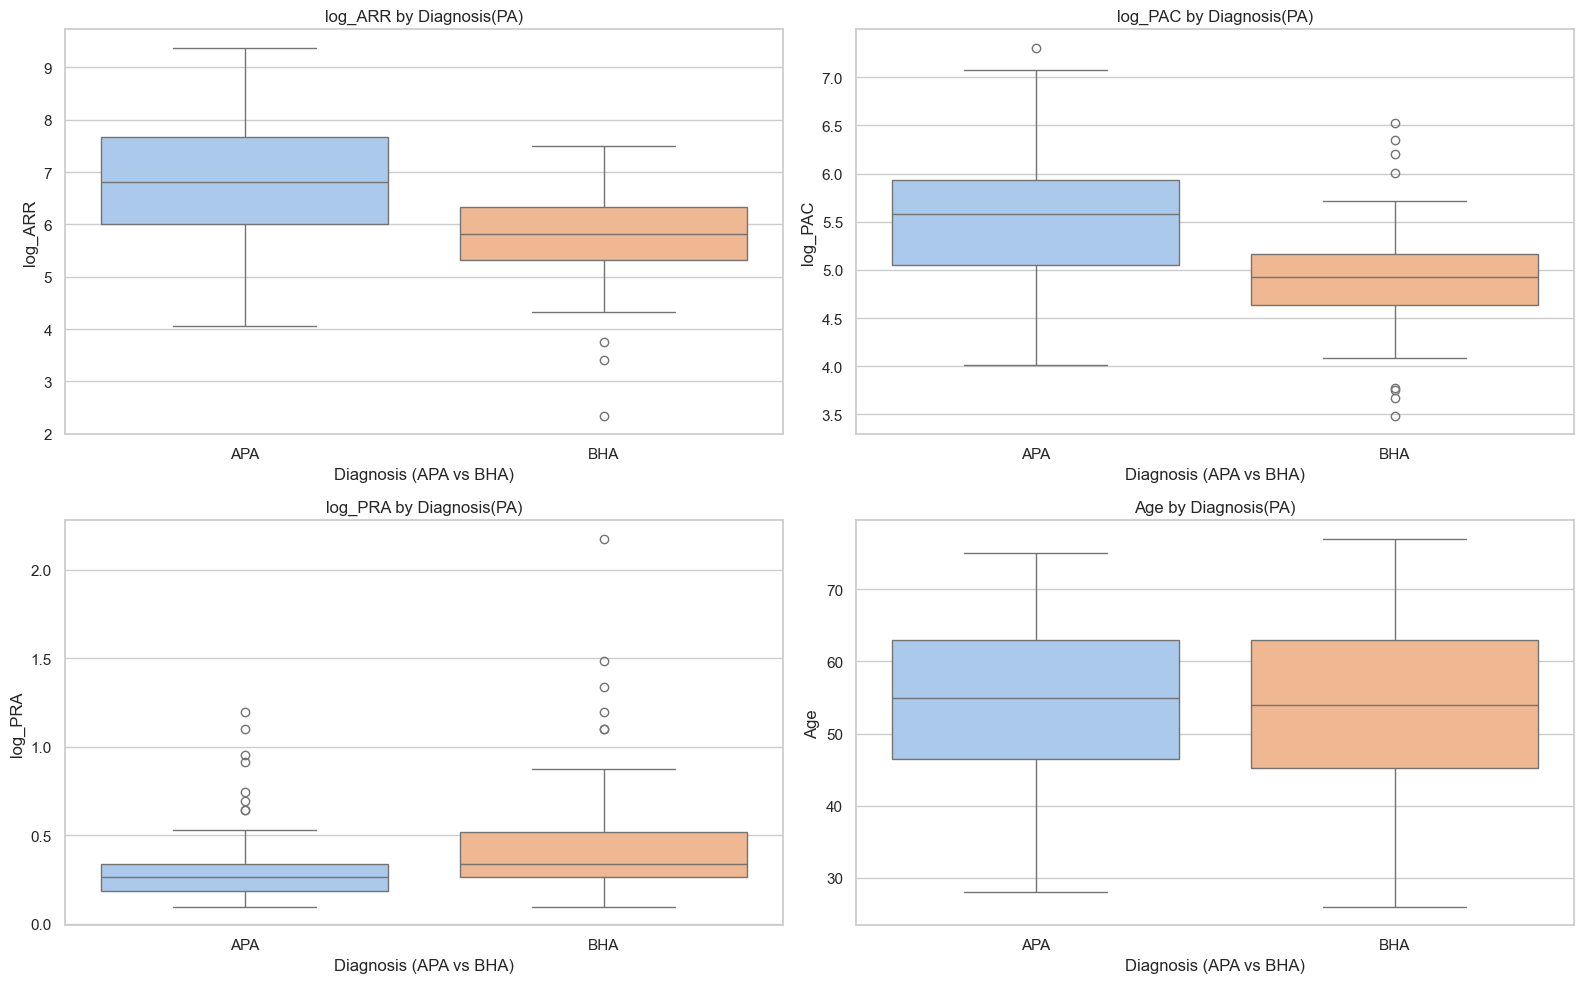

In [15]:
# Define features
features = ['log_ARR', 'log_PAC', 'log_PRA', 'Age']

# Set up a 2x2 grid for boxplots grouped by Diagnosis(PA)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Create each boxplot
for i, feature in enumerate(features):
    sns.boxplot(
        data=avs_df,
        x='Diagnosis(PA)',
        hue='Diagnosis(PA)',
        y=feature,
        ax=axes[i],
        palette="pastel"
        )
    axes[i].set_title(f"{feature} by Diagnosis(PA)")
    axes[i].set_xlabel("Diagnosis (APA vs BHA)")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.savefig('../outputs/figures/descriptive/boxplot.png')
plt.show()

##### Insights:
- log_ARR: APA patients have significantly higher ARR values, still the strongest differentiator.

- log_PAC: APA group shows higher PAC overall with a noticeable right-skew, consistent with aldosterone-producing tumors.

- log_PRA: Slightly lower PRA in APA compared to BHA, supports why ARR is elevated (low denominator). Not as dramatic as log_ARR, but still useful.

- Age: BHA patients tend to be a bit older, could be a secondary factor in prediction.